In [1]:
# Imports

import torchaudio
import numpy as np
from matplotlib import pyplot as plt
import librosa
import os, sys
import pandas as pd

import re

In [66]:
from pathlib import Path
from glob import glob
from typing import Literal
# Files
ASSET_FOLDER = Path("..") / ".." / "assets"
# using indexing so I dont have to specify the folder name
DATASET_FOLDER = Path(glob(str(ASSET_FOLDER / "*dataset*"))[0]) 
TRAINING_DATA_FOLDER = DATASET_FOLDER / "training_data"
file = TRAINING_DATA_FOLDER  / "2530_AV.wav"

assert file.is_file() , f"File does not exist {file}"

# Task


### For Exploratory Data Analysis (EDA), you can do the followings:


- Plot the audio wave-form for couple of subjects

- How many age groups do we have in the dataset? How many unique type of disease do exist?

- How many types of channels do we have? Which one is common among all measurements? 

- Obtain the percentage of each channel across all recordings.

- Obtain the correlation among different channels for a few subjects from different age groups

- Explore Short-Time-Frequency-Transform (STFT) and Mel Spectrogram: https://medium.com/analytics-vidhya/understanding-the-mel-spectrogram-fca2afa2ce53. Apply these two transformations for some subjects




### Descriptive Statistics:

###### Calculate mean, median, and standard deviation of age and recording duration.


- Visualization: 
    - Create histograms and box plots for age and recording duration.

- Cardiac Murmurs Analysis:
    - Distribution across age groups and auscultation locations.

- Annotations Analysis:
    - Explore timing, shape, pitch, grading, quality, and location of murmurs.

- Segmentation Annotations:
    - Analyze consensus and mismatches between algorithms and human annotations.
    
- Correlation Analysis:
    - Study correlations between different annotation types and age groups.

## Section below is for descriptive statistics

In [3]:
import csv
from collections import Counter

In [4]:
metadata = {}
with open(DATASET_FOLDER / "training_data.csv", "r") as f:
    csvreader = csv.DictReader(f)
    
    for row in csvreader:
        for key, value in row.items():
            if key not in metadata:
                metadata[key] = []
            metadata[key].append(value)


- Patient ID
- Recording locations:
- Age
- Sex
- Height
- Weight
- Pregnancy status
- Murmur
- Murmur locations
- Most audible location
- Systolic murmur timing
- Systolic murmur shape
- Systolic murmur grading
- Systolic murmur pitch
- Systolic murmur quality
- Diastolic murmur timing
- Diastolic murmur shape
- Diastolic murmur grading
- Diastolic murmur pitch
- Diastolic murmur quality
- Outcome
- Campaign
- Additional ID

In [5]:
Counter(metadata["Most audible location"])

Counter({'nan': 763, 'TV': 56, 'PV': 62, 'MV': 42, 'AV': 19})

In [6]:
age_groups = Counter(metadata["Age"])

In [7]:
# Data from : https://physionet.org/content/circor-heart-sound/1.0.3/

"""
Neonate: birth to 27 DAYS old
Infant: 28 DAYS old to 1 YEAR old
Child: 1 to 11 YEARS old
Adolescent: 12 to 18 YEARS old
Young Adult: 19 to 21 YEARS old
"""

"""
A total number of 5272 heart sound recordings were 

collected from the main four auscultation locations

1568 subjects

aged     between 0 and 21 years (mean ± STD = 6.1 ± 4.3 years), 
duration between 4.8 to 80.4 seconds (mean ± STD = 22.9 ± 7.4 s), 
"""

age_groups

Counter({'Child': 664,
         'Adolescent': 72,
         'Infant': 126,
         'nan': 74,
         'Neonate': 6})

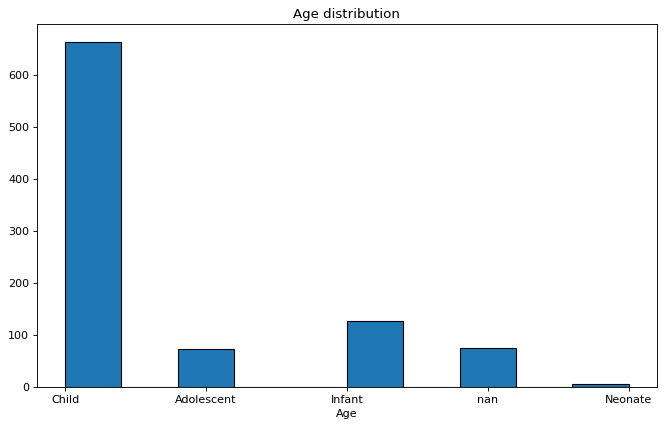

In [54]:
import matplotlib.pyplot as plt
import numpy as np

def create_histogram(data : list, title='', x_label=''):
    plt.figure(figsize=(10, 6), dpi=80)
    
    plt.hist(data,edgecolor="black")
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.show()



create_histogram(
    metadata["Age"],
    "Age distribution",
    "Age",
)

# create_histogram(
#     list(data_original["Age"]),
#     "Age distribution",
#     "Age",
# )



In [9]:
# Recording duration data

files = glob(str(TRAINING_DATA_FOLDER / "*"))

In [10]:
exts = [os.path.splitext(file)[1] for file in files]
print(set(exts))

{'.tsv', '.hea', '.wav', '.txt'}


In [11]:
channels = [os.path.basename(file).split(".")[0] for file in files if file[-3:] == "wav" ]
channels = [match for item in channels for match in re.findall(r'[A-Za-z]+', item)]

In [62]:
import itertools

In [63]:
list(itertools.chain(*[ channels.split("+") for channels in list(data_original["Recording locations:"])]))

['AV',
 'PV',
 'TV',
 'MV',
 'AV',
 'PV',
 'TV',
 'MV',
 'AV',
 'PV',
 'TV',
 'MV',
 'AV',
 'PV',
 'TV',
 'MV',
 'AV',
 'PV',
 'TV',
 'MV',
 'AV',
 'PV',
 'TV',
 'MV',
 'AV',
 'PV',
 'TV',
 'MV',
 'AV',
 'PV',
 'TV',
 'MV',
 'AV',
 'PV',
 'TV',
 'MV',
 'AV',
 'MV',
 'AV',
 'PV',
 'TV',
 'MV',
 'AV',
 'PV',
 'TV',
 'MV',
 'AV',
 'PV',
 'TV',
 'MV',
 'AV',
 'MV',
 'AV',
 'PV',
 'TV',
 'MV',
 'AV',
 'PV',
 'TV',
 'MV',
 'PV',
 'TV',
 'MV',
 'AV',
 'PV',
 'TV',
 'MV',
 'AV',
 'PV',
 'TV',
 'MV',
 'AV',
 'PV',
 'TV',
 'MV',
 'AV',
 'PV',
 'TV',
 'MV',
 'AV',
 'PV',
 'TV',
 'MV',
 'AV',
 'PV',
 'TV',
 'MV',
 'AV',
 'PV',
 'TV',
 'MV',
 'AV',
 'AV',
 'PV',
 'TV',
 'MV',
 'MV',
 'AV',
 'MV',
 'AV',
 'MV',
 'AV',
 'PV',
 'TV',
 'MV',
 'AV',
 'PV',
 'TV',
 'MV',
 'AV',
 'PV',
 'TV',
 'MV',
 'PV',
 'TV',
 'MV',
 'AV',
 'PV',
 'TV',
 'MV',
 'AV',
 'PV',
 'TV',
 'MV',
 'AV',
 'PV',
 'TV',
 'MV',
 'AV',
 'MV',
 'AV',
 'MV',
 'MV',
 'AV',
 'PV',
 'TV',
 'MV',
 'AV',
 'MV',
 'AV',
 'MV',
 'AV',
 'PV',

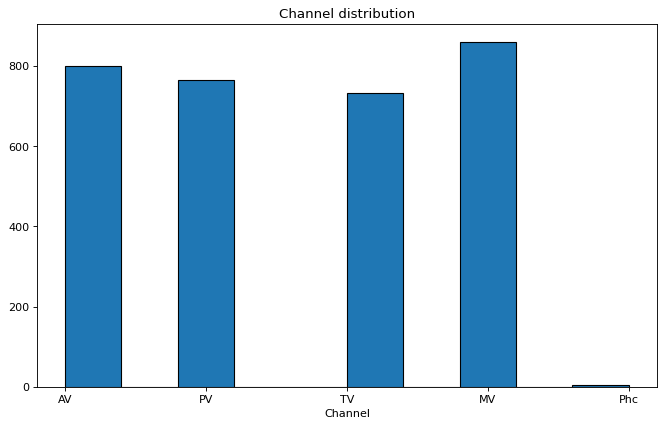

In [64]:
create_histogram(
    list(itertools.chain(*[ channels.split("+") for channels in list(data_original["Recording locations:"])])),
    "Channel distribution",
    "Channel",
)

In [13]:
# Duration Distrubution on time
from pydub import AudioSegment
from tqdm import tqdm
import wfdb

def channels_iterator(folder : Path, channel : Literal["AV","TV","MV","PV","Phc"], ext : Literal[".txt",".wav"]):
    return iter(glob( str(folder / f"*{channel}*{ext}") ))

def get_audio_info(audio_file_path : str):
    try:
        audio = AudioSegment.from_file(audio_file_path)
        duration_in_seconds = len(audio) / 1000.0  # Convert to seconds
        sample_rate = audio.frame_rate

        return duration_in_seconds, sample_rate

    except Exception as e:
        print(f"Error: {e}")
        raise e
    
def get_hea_info(hea_file):
    record = wfdb.rdheader(hea_file[:-4])
    duration = record.sig_len / record.fs  # Calculate duration in seconds
    sample_rate = record.fs
    return duration, sample_rate

In [65]:
my_channels

['Phc', 'AV', 'PV', 'MV', 'TV']

# Checking header data is accurate
- By comparing graph from header data and actual audio file
- Compare each channel, TV, PV, AV,MV, Phc

### Box plot with stats on duration of audio files

4it [00:00, 37.70it/s]


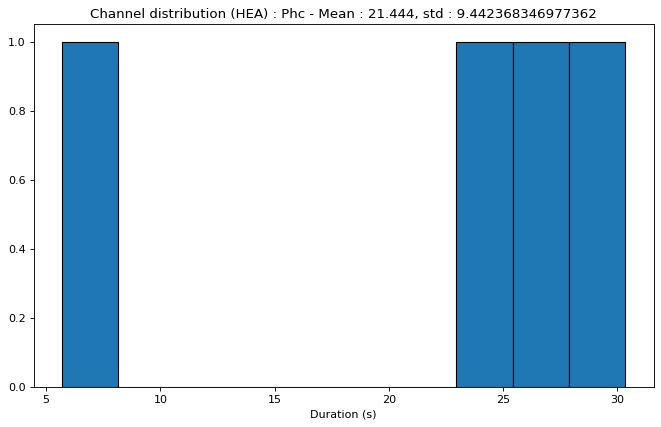

800it [00:02, 310.80it/s]


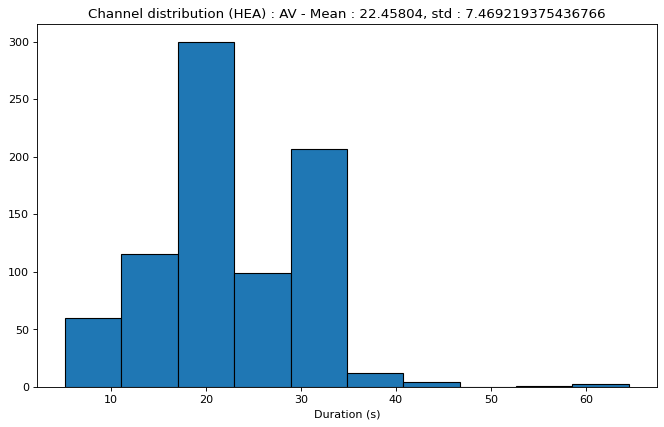

766it [00:02, 328.45it/s]


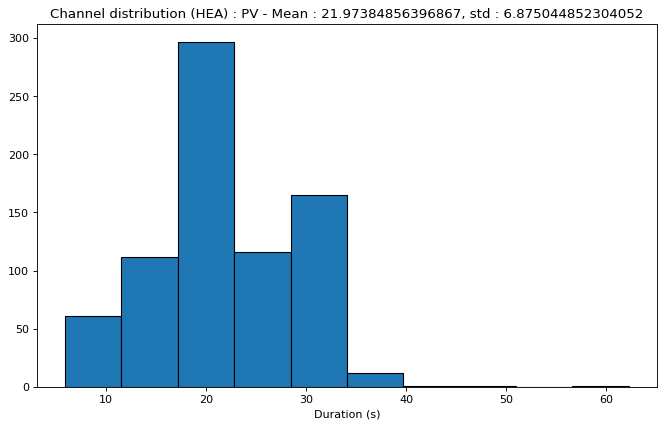

861it [00:02, 386.51it/s]


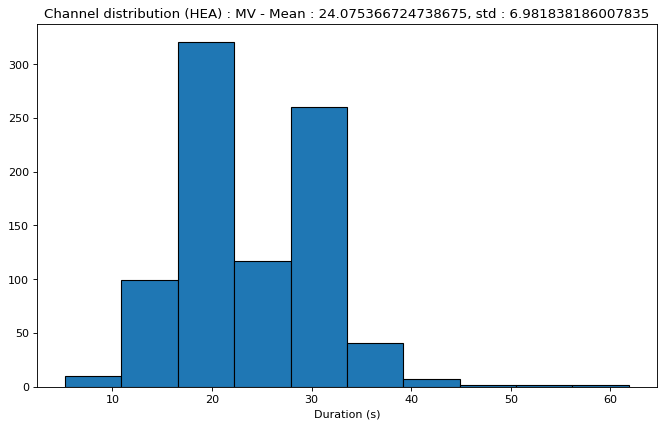

732it [00:01, 368.10it/s]


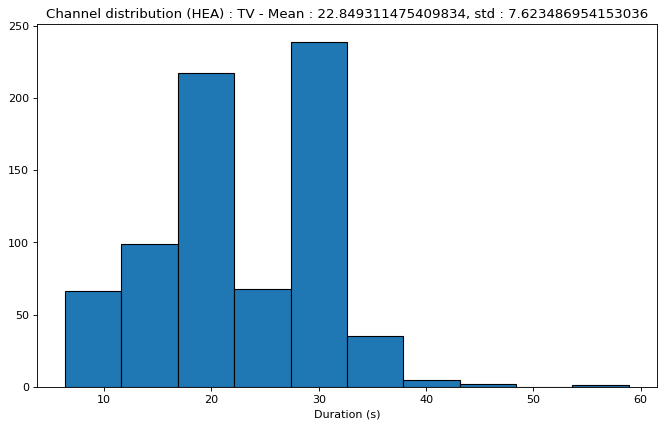

ValueError: Dimensions of labels and X must be compatible

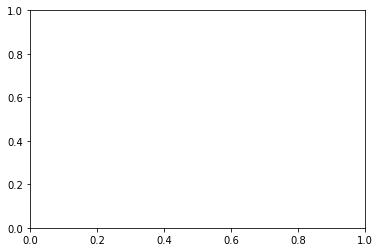

In [47]:
box_plot_durations = []
for channel in ['Phc', 'AV', 'PV', 'MV', 'TV']:
    
#     durations = []
    # 2 checking, 
    # one is on the wav files -> audio
#     for file in tqdm(channels_iterator(TRAINING_DATA_FOLDER, channel, ".wav")):
#         secs, samp_rate = get_audio_info(file)
#         durations.append(secs)
        
#     mean, std = np.mean(durations), np.std(durations)
        
#     create_histogram(
#         durations,
#         f"Channel distribution (WAV) : {channel} - Mean : {mean}, std : {std}",
#         f"Duration (s)",
#     )
#     box_plot_durations.append(durations)
#     continue # Remove this line to see graph from header file
    
    
    durations = []
    # second is hea file check -> header detail
    for file in tqdm(channels_iterator(TRAINING_DATA_FOLDER, channel, ".hea")):
        secs, samp_rate = get_hea_info(file)
        durations.append(secs)
        
    mean, std = np.mean(durations), np.std(durations)
        
    create_histogram(
        durations,
        f"Channel distribution (HEA) : {channel} - Mean : {mean}, std : {std}",
        f"Duration (s)",
    )
    
    
    
plt.boxplot(box_plot_durations, labels = my_channels)
plt.title('Box Plot for each channel duration')
plt.xlabel('Channels')
plt.ylabel('Time (s)')

plt.show()
    
        
    
        
        
        

In [15]:
# For each age group check murmur exist, unknow, not exist


In [16]:
# Annotations Analysis:

# Explore timing, shape, pitch, grading, quality, and location of murmurs.



data_original = pd.read_csv(DATASET_FOLDER / "training_data.csv")


In [17]:
set(list(data_original['Diastolic murmur timing']))

{'Early-diastolic', nan}

In [18]:
list(data_original["Height"])

[98.0,
 103.0,
 115.0,
 98.0,
 87.0,
 nan,
 92.0,
 98.0,
 88.0,
 82.0,
 90.0,
 141.0,
 174.0,
 76.0,
 108.0,
 76.0,
 88.0,
 125.0,
 116.0,
 147.0,
 69.0,
 152.0,
 141.0,
 111.0,
 70.0,
 79.0,
 150.0,
 74.0,
 79.0,
 124.0,
 122.0,
 141.0,
 95.0,
 129.0,
 130.0,
 114.0,
 89.0,
 83.0,
 56.0,
 133.0,
 nan,
 62.0,
 136.0,
 92.0,
 180.0,
 101.0,
 78.0,
 121.0,
 151.0,
 122.0,
 95.0,
 60.0,
 134.0,
 103.0,
 148.0,
 133.0,
 52.0,
 133.0,
 102.0,
 93.0,
 134.0,
 131.0,
 142.0,
 101.0,
 144.0,
 54.0,
 92.0,
 121.0,
 133.0,
 104.0,
 57.0,
 155.0,
 80.0,
 98.0,
 133.0,
 145.0,
 77.0,
 110.0,
 131.0,
 55.0,
 120.0,
 124.0,
 115.0,
 55.0,
 nan,
 nan,
 nan,
 nan,
 35.0,
 nan,
 162.0,
 81.0,
 nan,
 60.0,
 82.0,
 140.0,
 170.0,
 89.0,
 142.0,
 130.0,
 115.0,
 nan,
 119.0,
 nan,
 143.0,
 123.0,
 96.0,
 123.0,
 nan,
 118.0,
 103.0,
 123.0,
 nan,
 nan,
 108.0,
 135.0,
 85.0,
 nan,
 94.0,
 158.0,
 176.0,
 67.0,
 113.0,
 89.0,
 76.0,
 138.0,
 123.0,
 123.0,
 47.0,
 65.0,
 110.0,
 90.0,
 123.0,
 127.0,
 164.

In [19]:
skip = ['Patient ID','Additional ID','Campaign', 'Height', 'Weight']

for key in data_original.keys():
    if key in skip:
        continue
    
    print(f"{key} : {set(list(data_original[key]))}")

Recording locations: : {'AV+AV+PV+TV+MV', 'AV+AV+AV+MV', 'AV+AV+MV', 'PV+MV', 'AV+AV+PV+PV+TV+MV', 'TV+MV', 'PV+TV+MV', 'AV+TV+MV', 'AV+MV+MV', 'PV+TV', 'MV', 'AV+MV', 'AV+PV+TV+MV+MV', 'TV', 'TV+MV+Phc', 'AV+PV+TV+MV+Phc', 'AV+PV+TV', 'PV', 'AV+PV+TV+TV+MV', 'PV+TV+TV', 'AV+PV+MV+Phc+Phc', 'AV+AV+MV+MV', 'AV+PV+PV+TV+TV+MV', 'AV+PV+MV', 'AV+PV', 'AV', 'AV+AV+PV+TV+MV+MV', 'AV+PV+TV+MV'}
Age : {nan, 'Adolescent', 'Neonate', 'Infant', 'Child'}
Sex : {'Female', 'Male'}
Pregnancy status : {False, True}
Murmur : {'Unknown', 'Absent', 'Present'}
Murmur locations : {nan, 'MV+TV', 'AV+PV', 'MV+Phc+TV', 'AV+PV+TV', 'AV+MV+TV', 'AV+MV+PV+Phc+TV', 'PV+TV', 'AV+MV+PV+TV', 'MV', 'AV+MV', 'AV+MV+PV', 'PV', 'AV', 'AV+TV', 'MV+PV+TV', 'TV', 'MV+PV'}
Most audible location : {nan, 'AV', 'PV', 'MV', 'TV'}
Systolic murmur timing : {nan, 'Holosystolic', 'Early-systolic', 'Mid-systolic', 'Late-systolic'}
Systolic murmur shape : {nan, 'Decrescendo', 'Diamond', 'Crescendo', 'Plateau'}
Systolic murmur grading

# correlation map

- Age is mapped based on mean of the age group label

#### Result :
- Age appears to show no/very little correlation with the result 
- **Systolic murmur** appears to have around ~0.35 value in correlation with **Diastolic murmur**
- **Systolic murmur** has a higer (~0.5) value in correlation with positive result
- **Diastolic murmur** have around ~0.15 with positive result

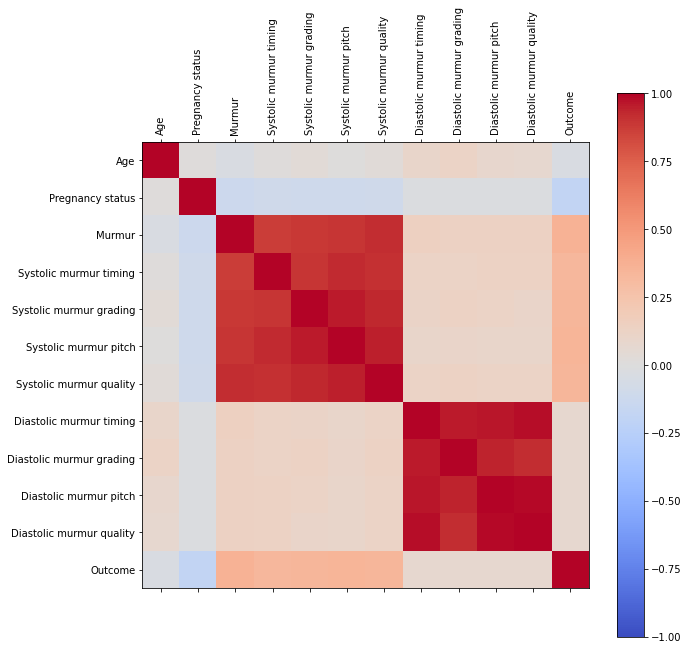

In [46]:
data = data_original.copy(deep=True)


# As for now , height and weight is not included for the reason of age group & sex
mappings = {
    "Age" : {'Adolescent' : (18+12)/2, np.nan : 6.1, 'Neonate' : (27+0)/(2*365),
             'Child' : (11+1)/2, 'Infant' :(365+27)/(2*365)}, # I'm doing this mean age of each group
    "Pregnancy status" : {False : -1, True : 1},
    'Murmur': {"Present": 1, "Absent": -1, "Unknown": 0},
    'Systolic murmur timing': {"Early-systolic": 1, "Holosystolic": 4,
                               "Late-systolic": 3, "Mid-systolic": 2, np.nan: -1},
    'Systolic murmur grading': {"I/VI": 1, "II/VI": 2, "III/VI": 3, np.nan: -1},
    'Systolic murmur pitch': {"Low": 1, "Medium": 2, "High": 3, np.nan: -1},
    'Systolic murmur quality': {"Blowing": 1, "Harsh": 2, "Musical": 3, np.nan: -1},
    'Diastolic murmur timing': {"Early-diastolic": 1, "Holodiastolic": 3,
                                "Mid-diastolic": 2, np.nan: -1},
    'Diastolic murmur grading': {"I/IV": 1, "II/IV": 2, "III/IV": 3, np.nan: -1},
    'Diastolic murmur pitch': {"Low": 1, "Medium": 2, "High": 3, np.nan: -1},
    'Diastolic murmur quality': {"Blowing": 1, "Harsh": 2, np.nan: -1},
    "Outcome": {"Normal": -1, "Abnormal": 1}
}

all_fields = list(mappings.keys())




for column, mapping in mappings.items():
    data[column] = data[column].map(mapping)

    
# Calculate the correlation matrix for the selected columns
correlation_matrix = data[all_fields].corr()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Create the correlation matrix heatmap
cax = ax.matshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# Set the x and y tick labels
ax.set_xticks(range(len(all_fields)))
ax.set_yticks(range(len(all_fields)))
ax.set_xticklabels(all_fields, rotation=90)
ax.set_yticklabels(all_fields)

# Add a colorbar
fig.colorbar(cax)

# Show the plot
plt.show()




In [21]:
data["Diastolic murmur timing"]

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
937   -1
938   -1
939   -1
940   -1
941   -1
Name: Diastolic murmur timing, Length: 942, dtype: int64

In [22]:
import gc

In [23]:
gc.collect()

55

In [24]:
data["Murmur"]

0     -1
1      1
2      0
3      1
4      1
      ..
937   -1
938   -1
939    1
940   -1
941   -1
Name: Murmur, Length: 942, dtype: int64

In [25]:
f = data.loc[data['Patient ID'] == 2530]

In [26]:
f["Age"].values[0]

6.0

In [30]:
import sys
sys.path.insert(0, "../../scripts")
import dataloader as dl


In [31]:
dset = dl.PhonocardiogramByIDDataset(
        str(DATASET_FOLDER / "training_data.csv"),
        DATASET_FOLDER / "training_data"
    )


In [33]:
files, audios, mostAudi, row = dset[85174]

In [35]:
files

{'AV': {'header': ['../../assets/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/85174_AV.hea'],
  'segment': ['../../assets/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/85174_AV.tsv'],
  'text': ['../../assets/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/85174.txt'],
  'audio': ['../../assets/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/85174_AV.wav']},
 'PV': {'header': ['../../assets/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/85174_PV.hea'],
  'segment': ['../../assets/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/85174_PV.tsv'],
  'text': ['../../assets/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/85174.txt'],
  'audio': ['../../assets/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/85174_PV.wav']},
 'MV': {'header': ['../../assets/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/85174_MV.hea'],
  'segment': ['../

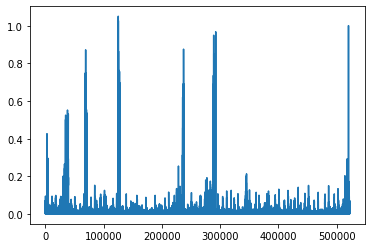

In [42]:
# audios["AV"]["audio"][0][0]

plt.plot(np.abs(audios["AV"]["audio"][0][0]))

In [43]:
row.keys()

Index(['Patient ID', 'Recording locations:', 'Age', 'Sex', 'Height', 'Weight',
       'Pregnancy status', 'Murmur', 'Murmur locations',
       'Most audible location', 'Systolic murmur timing',
       'Systolic murmur shape', 'Systolic murmur grading',
       'Systolic murmur pitch', 'Systolic murmur quality',
       'Diastolic murmur timing', 'Diastolic murmur shape',
       'Diastolic murmur grading', 'Diastolic murmur pitch',
       'Diastolic murmur quality', 'Outcome', 'Campaign', 'Additional ID'],
      dtype='object')

In [44]:
row

,Patient ID,Recording locations:,Age,Sex,Height,Weight,Pregnancy status,Murmur,Murmur locations,Most audible location,...,Systolic murmur pitch,Systolic murmur quality,Diastolic murmur timing,Diastolic murmur shape,Diastolic murmur grading,Diastolic murmur pitch,Diastolic murmur quality,Outcome,Campaign,Additional ID
845,85174,AV+PV+TV+MV,Child,Male,122.0,20.8,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN


In [52]:
list(data_original["Age"])

['Child',
 'Child',
 'Child',
 'Child',
 'Child',
 'Child',
 'Child',
 'Child',
 'Child',
 'Child',
 'Child',
 'Child',
 'Adolescent',
 'Child',
 'Child',
 'Child',
 'Child',
 'Child',
 'Child',
 'Adolescent',
 'Child',
 'Adolescent',
 'Adolescent',
 'Child',
 'Child',
 'Child',
 'Adolescent',
 'Child',
 'Child',
 'Child',
 'Child',
 'Child',
 'Child',
 'Child',
 'Child',
 'Child',
 'Child',
 'Child',
 'Infant',
 'Child',
 'Infant',
 'Infant',
 'Child',
 'Child',
 'Adolescent',
 'Child',
 'Child',
 'Child',
 'Adolescent',
 'Child',
 'Child',
 'Infant',
 'Child',
 'Child',
 'Child',
 'Child',
 'Infant',
 'Child',
 'Child',
 'Child',
 'Child',
 'Child',
 'Adolescent',
 'Child',
 'Child',
 'Infant',
 'Child',
 'Child',
 'Child',
 'Child',
 'Infant',
 'Adolescent',
 'Child',
 'Child',
 'Child',
 'Child',
 'Child',
 'Child',
 'Child',
 'Infant',
 'Child',
 'Child',
 'Child',
 'Infant',
 nan,
 nan,
 nan,
 nan,
 'Child',
 nan,
 'Adolescent',
 'Child',
 nan,
 'Infant',
 'Child',
 'Child',
 'Ad